In [1]:
import pandas as pd
from MLP import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

# Dataset Preprocessing

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/markusreynoso/dashboard-datasets/refs/heads/main/Thesis/cancer_classification.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.columns = [x.strip().replace(' ', '_').lower() for x in df.columns]
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'benign_0__mal_1'],
      dtype='object')

In [5]:
df = df.sample(frac=1, random_state=15)
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,benign_0__mal_1
350,11.660,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,0.1671,0.05731,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,1
222,10.180,17.53,65.12,313.1,0.10610,0.08502,0.017680,0.01915,0.1910,0.06908,...,22.84,71.94,375.6,0.14060,0.14400,0.06572,0.05575,0.3055,0.08797,1
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.05943,0.1861,0.06248,...,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,0
447,14.800,17.66,95.88,674.8,0.09179,0.08890,0.040690,0.02260,0.1893,0.05886,...,22.74,105.90,829.5,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285,1
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.061540,0.03029,0.1945,0.06322,...,26.83,72.22,361.2,0.15590,0.23020,0.26440,0.09749,0.2622,0.08490,1


In [6]:
X = df.loc[:, 'mean_radius':'worst_fractal_dimension'].to_numpy()
X

array([[1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
        6.825e-02],
       [1.018e+01, 1.753e+01, 6.512e+01, ..., 5.575e-02, 3.055e-01,
        8.797e-02],
       [1.611e+01, 1.805e+01, 1.051e+02, ..., 1.216e-01, 2.792e-01,
        8.158e-02],
       ...,
       [1.768e+01, 2.074e+01, 1.174e+02, ..., 1.515e-01, 2.463e-01,
        7.738e-02],
       [1.328e+01, 1.372e+01, 8.579e+01, ..., 9.173e-02, 2.736e-01,
        7.320e-02],
       [1.163e+01, 2.929e+01, 7.487e+01, ..., 6.835e-02, 2.884e-01,
        7.220e-02]])

In [7]:
Y = pd.get_dummies(df['benign_0__mal_1']).astype(int).to_numpy()
Y

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [0, 1],
       [0, 1]])

## Splitting

In [8]:
X.shape

(569, 30)

In [9]:
round(X.shape[0] * 0.7)

398

In [10]:
round(X.shape[0] * 0.15)

85

In [11]:
398+85

483

In [12]:
scaler = StandardScaler()
x_train, x_validate, x_test = scaler.fit_transform(X[:398]), scaler.fit_transform(X[398:483]), scaler.fit_transform(X[483:])
y_train, y_validate, y_test = Y[:398], Y[398:483], Y[483:]

In [13]:
markus_val_acc_list = []
sb_val_acc_list = []

# Main

## Training

In [14]:
np.random.seed(15)

In [15]:
model = MLP([
            Layer(30, 15),
            Layer(15, 15),
            Layer(15, 2, activation='softmax'),
        ],
            0.001,
            lossFunction='ce')


In [16]:
# 796 epochs
# 0.992462311557789
# 0.9764705882352941

model1 = copy.deepcopy(model)
model1.train(x_train, y_train, 796, alg='sgd')
model1TrainAcc = model1.test(x_train, y_train)
model1ValAcc = model1.test(x_validate, y_validate)
print(model1TrainAcc)
print(model1ValAcc)

0.992462311557789
0.9764705882352941


In [17]:
# 0.9874371859296482
# 0.9764705882352941

model2 = copy.deepcopy(model)
model2.train(x_train, y_train, 796, regularizers={'l2':0.005, 'l0Lambda':0.005, 'l0Beta':50}, alg='sgd')
model2TrainAcc = model2.test(x_train, y_train)
model2ValAcc = model2.test(x_validate, y_validate)
print(model2TrainAcc)
print(model2ValAcc)

0.9849246231155779
0.9764705882352941


In [18]:
# 381 epochs
# 0.992462311557789
# 0.9764705882352941

model3 = copy.deepcopy(model)
model3.train(x_train, y_train, 381, alg='adam')
model3TrainAcc = model3.test(x_train, y_train)
model3ValAcc = model3.test(x_validate, y_validate)
print(model3TrainAcc)
print(model3ValAcc)

0.9899497487437185
0.9764705882352941


In [19]:
model4 = copy.deepcopy(model)

model4.train(x_train, y_train, 381, regularizers={'l2':0.005, 'l0Lambda':0.005, 'l0Beta':200}, alg='adam')
model4TrainAcc = model4.test(x_train, y_train)
model4ValAcc = model4.test(x_validate, y_validate)
print(model4TrainAcc)
print(model4ValAcc)

0.9874371859296482
0.9764705882352941


In [20]:
model5 = copy.deepcopy(model4)
model5.pruneSmall(0.5)
print(model5.test(x_validate, y_validate))
print(model5.test(x_train, y_train))

0.9764705882352941
0.9874371859296482


In [21]:
model1Weights = []
for layer in model1.hiddenLayers:
    model1Weights += list(layer.weights.flatten())
model1Weights += list(model1.outputLayer.weights.flatten())

model2Weights = []
for layer in model2.hiddenLayers:
    model2Weights += list(layer.weights.flatten())
model2Weights += list(model2.outputLayer.weights.flatten())

model3Weights = []
for layer in model3.hiddenLayers:
    model3Weights += list(layer.weights.flatten())
model3Weights += list(model3.outputLayer.weights.flatten())

model4Weights = []
for layer in model4.hiddenLayers:
    model4Weights += list(layer.weights.flatten())
model4Weights += list(model4.outputLayer.weights.flatten())

model5Weights = []
for layer in model5.hiddenLayers:
    model5Weights += list(layer.weights.flatten())
model5Weights += list(model5.outputLayer.weights.flatten())

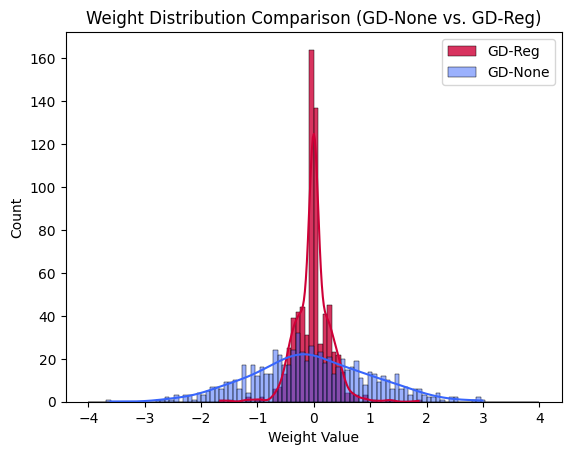

In [22]:
bins = np.linspace(-4, 4, 101)

sns.histplot(model2Weights, bins=bins, color='#cf0037', kde=True, label="GD-Reg", alpha=0.8)
sns.histplot(model1Weights, bins=bins, color='#3865fc', kde=True, label="GD-None")
plt.xticks(ticks=range(-4, 5, 1))

plt.title("Weight Distribution Comparison (GD-None vs. GD-Reg)")
plt.xlabel("Weight Value")
plt.legend()
plt.show()

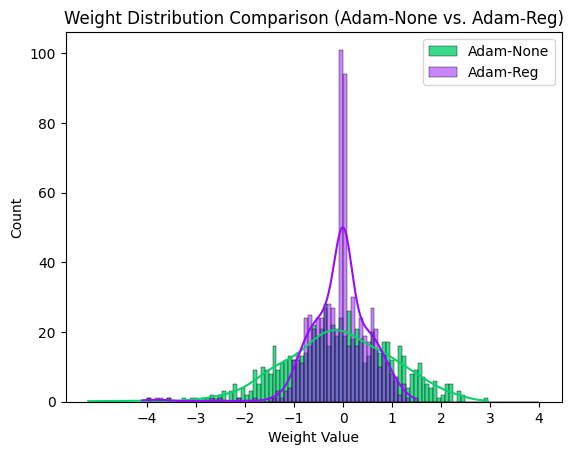

In [23]:
bins = np.linspace(-4, 4, 101)

sns.histplot(model3Weights, bins=bins, color='#0ad16e', kde=True, label="Adam-None", alpha=0.8)
sns.histplot(model4Weights, bins=bins, color='#990aff', kde=True, label="Adam-Reg")
plt.xticks(ticks=range(-4, 5, 1))

plt.title("Weight Distribution Comparison (Adam-None vs. Adam-Reg)")
plt.xlabel("Weight Value")
plt.legend()
plt.show()

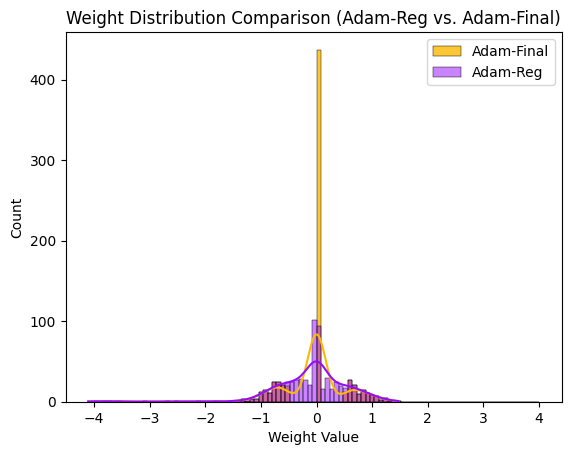

In [24]:
bins = np.linspace(-4, 4, 101)

sns.histplot(model5Weights, bins=bins, color='#fcba03', kde=True, label="Adam-Final", alpha=0.8)
sns.histplot(model4Weights, bins=bins, color='#990aff', kde=True, label="Adam-Reg")
plt.xticks(ticks=range(-4, 5, 1))

plt.title("Weight Distribution Comparison (Adam-Reg vs. Adam-Final)")
plt.xlabel("Weight Value")
plt.legend()
plt.show()

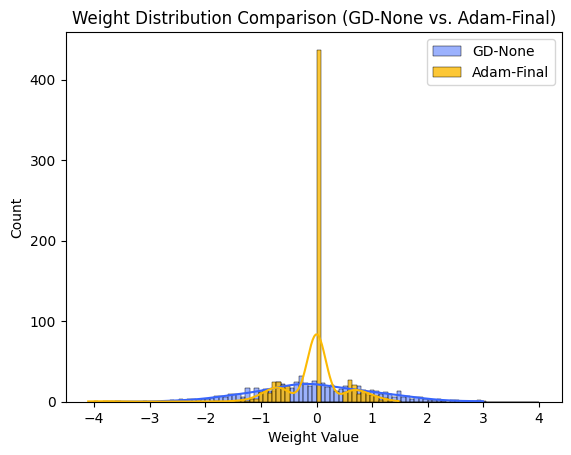

In [25]:
bins = np.linspace(-4, 4, 101)

sns.histplot(model1Weights, bins=bins, color='#3865fc', kde=True, label="GD-None")
sns.histplot(model5Weights, bins=bins, color='#fcba03', kde=True, label="Adam-Final", alpha=0.8)
plt.xticks(ticks=range(-4, 5, 1))

plt.title("Weight Distribution Comparison (GD-None vs. Adam-Final)")
plt.xlabel("Weight Value")
plt.legend()
plt.show()

In [26]:
print(model1.test(x_test, y_test))
print(model2.test(x_test, y_test))
print(model3.test(x_test, y_test))
print(model4.test(x_test, y_test))
print(model5.test(x_test, y_test))

0.9767441860465116
0.9883720930232558
0.9883720930232558
0.9883720930232558
0.9767441860465116


In [27]:
model5ZeroCount = 0
for weight in model5Weights:
    if weight == 0:
        model5ZeroCount += 1

print(f"Model 5 Sparsity: {round(model5ZeroCount/len(model5Weights) * 100, 2)}%")

Model 5 Sparsity: 61.99%
